In [127]:
from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

def load_cities():
    with open("data_lab2/cities.dat") as f:
        rows = f.read().split("\n")[0:-1]
        #print(rows)
        rows = [ row[:-1].split(", ") for row in rows ]
        rows = np.array(rows, dtype=float)
        return rows
    

In [128]:
cities = load_cities()

n_neurons = cities.shape[0]
epochs = 1000
eta  = 1e-2
scaling = 2e-1
neighbourhood_size = 2*scaling
nResize_step = [10,40]
verbose = False
verbose_level = 100

w = np.random.rand(cities.shape[0], cities.shape[1])

for i in range(epochs):
    
    if i > nResize_step[0]:
        neighbourhood_size = 1*scaling
    elif i > nResize_step[1]:
        neighbourhood_size = 0
    else:
        pass
    
    for j,city in enumerate(cities):
        dist = city - w
        dist_norm = np.linalg.norm(dist,axis=1)
        
        min_dist = np.amin(dist_norm)
        min_ind = np.where(dist_norm == min_dist)
        min_ind = min_ind[0]
        
        w[min_ind,:] = w[min_ind,:] + eta*(city - w[min_ind,:])
        
        neighbour_dist = np.zeros(cities.shape[0])
        for it,c in enumerate(cities):
            if it != j:
                n_dist = np.linalg.norm(c-city)
                neighbour_dist[it] = n_dist
        
        nMask = neighbour_dist <= neighbourhood_size/2
        w[nMask,:] = w[nMask,:] + eta*(city-w[nMask,:])
    
    wPoints = np.vstack([w,w[0,:]])
    if verbose:
        if i % (epochs/verbose_level) == 0:
            plt.figure()
            plt.plot(cities[:,0],cities[:,1],'or',label = 'Cities')
            plt.plot(wPoints.T[0],wPoints.T[1],'--k',label = 'The tour')
            plt.legend()
            plt.title('Epoch '+str(i*(epochs/verbose_level)))


winners = np.zeros(cities.shape[0])
for it,c in enumerate(cities):
    dist = c - w
    dist_norm = np.linalg.norm(dist,axis=1)
        
    min_dist = np.amin(dist_norm)
    min_ind = np.where(dist_norm == min_dist)
    min_ind = min_ind[0]
    
    w[min_ind,:] = w[min_ind,:] + eta*(c - w[min_ind,:])
            
    winners[it] = min_ind

sorted_cities = np.zeros(cities.shape)
for n,winner in enumerate(winners):
    sorted_cities[n,:] = cities[int(winner),:]
        


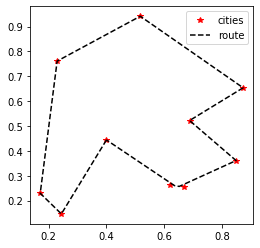

[[0.4    0.4439]
 [0.2439 0.1463]
 [0.1707 0.2293]
 [0.2293 0.761 ]
 [0.5171 0.9414]
 [0.8732 0.6536]
 [0.6878 0.5219]
 [0.8488 0.3609]
 [0.6683 0.2536]
 [0.6195 0.2634]]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [129]:
#make tour
wPoints = np.vstack([w,w[0,:]])

fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)


ax1.plot(cities[:,0],cities[:,1],'*r',label='cities')
#ax1.plot(wPoints[:,0],wPoints[:,1],'--k',label='route')
ax1.plot(wPoints[:,0],wPoints[:,1],'--k',label='route')
ax1.legend()

plt.show()

print(sorted_cities)
print(winners)